In [2]:
import pandas as pd

file_path = "SuperStoreUS-2015.xlsx"
data = pd.read_excel(file_path)

print(data.head())

   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   20847           High      0.01        2.84           0.93            3   
1   20228  Not Specified      0.02      500.98          26.00            5   
2   21776       Critical      0.06        9.48           7.29           11   
3   24844         Medium      0.09       78.69          19.99           14   
4   24846         Medium      0.08        3.28           2.31           14   

       Customer Name       Ship Mode Customer Segment Product Category  ...  \
0      Bonnie Potter     Express Air        Corporate  Office Supplies  ...   
1     Ronnie Proctor  Delivery Truck      Home Office        Furniture  ...   
2      Marcus Dunlap     Regular Air      Home Office        Furniture  ...   
3  Gwendolyn F Tyson     Regular Air   Small Business        Furniture  ...   
4  Gwendolyn F Tyson     Regular Air   Small Business  Office Supplies  ...   

    Region State or Province         City  Postal Code O

For this hackathon, I plan to create a supply chain optimization platform powered by AI. This platform will focus on demand forecasting, route optimization, and managing suppliers. By leveraging machine learning and real-time data analytics, it aims to help businesses improve their supply chain processes, cut costs, and make better decisions. Ultimately, this project is about enhancing efficiency and promoting sustainability in operations.

In [3]:

data.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1936.000000,1952.000000,1952,1952,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,0.515186,51534.769467,2015-03-29 01:21:08.852459008,2015-03-30 23:55:34.426229248,114.793859,12.944672,985.828832,82365.924180
min,64.000000,0.000000,1.140000,0.490000,3.000000,0.350000,1001.000000,2015-01-01 00:00:00,2015-01-02 00:00:00,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,0.380000,28560.000000,2015-02-11 00:00:00,2015-02-13 00:00:00,-84.485400,5.000000,58.807500,86767.750000
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,0.525000,48765.500000,2015-03-27 12:00:00,2015-03-29 00:00:00,1.476450,10.000000,202.395000,88376.000000
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,0.590000,78550.000000,2015-05-15 00:00:00,2015-05-16 00:00:00,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2015-06-30 00:00:00,2015-07-08 00:00:00,9228.225600,167.000000,45737.330000,91586.000000
std,5957.595627,0.031378,393.481301,17.414631,991.078006,0.137055,29362.828420,NaN,NaN,1141.112387,13.871565,2559.900167,19042.295798


In [4]:

total_nulls = data.isnull().sum()

print(total_nulls)



Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64


In [5]:
null_count = data.isnull().sum()

print(total_nulls)

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64


In [6]:

duplicates = data.duplicated()
print(f"Total number of duplicate rows: {duplicates.sum()}")

Total number of duplicate rows: 0


In [7]:
data['Product Base Margin'].fillna(data['Product Base Margin'].mean(), inplace=True)
print(data)

      Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0      20847           High      0.01        2.84           0.93            3   
1      20228  Not Specified      0.02      500.98          26.00            5   
2      21776       Critical      0.06        9.48           7.29           11   
3      24844         Medium      0.09       78.69          19.99           14   
4      24846         Medium      0.08        3.28           2.31           14   
...      ...            ...       ...         ...            ...          ...   
1947   19842           High      0.01       10.90           7.46         3397   
1948   19843           High      0.10        7.99           5.03         3397   
1949   26208  Not Specified      0.08       11.97           5.81         3399   
1950   24911         Medium      0.10        9.38           4.93         3400   
1951   25914           High      0.10      105.98          13.99         3403   

          Customer Name    

C:\Users\ammou\AppData\Local\Temp\ipykernel_11032\3779444177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product Base Margin'].fillna(data['Product Base Margin'].mean(), inplace=True)


In [8]:
columns = ['Order Priority', 'Ship Mode', 'Customer Segment', 
                       'Product Category', 'Product Sub-Category', 
                       'Product Container', 'Country', 'Region', 
                       'State or Province', 'City']

for column in columns:
    print(f"Unique values in '{column}':{data[column].unique()}\n")



Unique values in 'Order Priority':['High' 'Not Specified' 'Critical' 'Medium' 'Low' 'Critical ']

Unique values in 'Ship Mode':['Express Air' 'Delivery Truck' 'Regular Air']

Unique values in 'Customer Segment':['Corporate' 'Home Office' 'Small Business' 'Consumer']

Unique values in 'Product Category':['Office Supplies' 'Furniture' 'Technology']

Unique values in 'Product Sub-Category':['Pens & Art Supplies' 'Chairs & Chairmats' 'Office Furnishings'
 'Rubber Bands' 'Envelopes' 'Telephones and Communication'
 'Office Machines' 'Paper' 'Binders and Binder Accessories' 'Labels'
 'Storage & Organization' 'Tables' 'Scissors, Rulers and Trimmers'
 'Computer Peripherals' 'Bookcases' 'Appliances' 'Copiers and Fax']

Unique values in 'Product Container':['Wrap Bag' 'Jumbo Drum' 'Small Pack' 'Small Box' 'Medium Box' 'Jumbo Box'
 'Large Box']

Unique values in 'Country':['United States']

Unique values in 'Region':['West' 'East' 'Central' 'South']

Unique values in 'State or Province':['Washingt

In [9]:
print(data['Order Priority'].unique())

['High' 'Not Specified' 'Critical' 'Medium' 'Low' 'Critical ']


In [23]:
data.columns = data.columns.str.strip()
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

KeyError: 'Order_Date'

In [25]:
# Rename columns by stripping spaces and renaming properly
data.columns = data.columns.str.strip()  # Removes any leading/trailing spaces

# Check if there's a column with a similar name (e.g., 'Order Date' instead of 'Order_Date')
data.rename(columns={'Order Date': 'Order_Date'}, inplace=True)



In [26]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'], errors='coerce')

KeyError: 'Order_Date'

In [28]:
data

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Country,Region,State or Province,City,Postal Code,Ship Date,Profit,Quantity ordered new,Sales,Order ID
Order Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,20993,4,0.01,348.21,40.19,1552,Gary Koch,Delivery Truck,Small Business,Furniture,...,United States,South,Mississippi,Clinton,39056,2015-01-04,-337.0920,2,723.54,87486
2015-01-01,19233,1,0.01,5.84,1.20,3275,Tamara Dickinson,Regular Air,Small Business,Office Supplies,...,United States,West,Washington,Mount Vernon,98273,2015-01-10,20.3800,6,36.09,86234
2015-01-01,22824,1,0.04,2036.48,14.70,1425,Gregory Crane,Delivery Truck,Small Business,Technology,...,United States,West,Colorado,Fort Collins,80525,2015-01-06,-4793.0040,1,2013.67,89450
2015-01-01,22823,1,0.07,4.84,0.71,1418,Rebecca Lindsey,Regular Air,Small Business,Office Supplies,...,United States,Central,Indiana,Kokomo,46901,2015-01-03,25.2402,8,36.58,90539
2015-01-01,19914,0,0.08,95.99,35.00,2211,Anita Hahn,Express Air,Home Office,Office Supplies,...,United States,East,Maryland,Bowie,20715,2015-01-03,-425.2084,2,193.88,88028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-30,5140,3,0.01,7.89,2.82,699,Jenny Gold,Regular Air,Consumer,Office Supplies,...,United States,West,California,Los Angeles,90041,2015-07-01,38.7000,32,274.26,36647
2015-06-30,5141,3,0.09,3.68,1.32,699,Jenny Gold,Regular Air,Consumer,Office Supplies,...,United States,West,California,Los Angeles,90041,2015-07-01,-21.9100,24,83.16,36647
2015-06-30,5142,3,0.10,9.71,9.45,699,Jenny Gold,Regular Air,Consumer,Office Supplies,...,United States,West,California,Los Angeles,90041,2015-07-03,-119.7700,27,261.93,36647


In [10]:
data['Order Priority'] = data['Order Priority'].str.strip()

priority_mapping = {
    "Critical": 4,
    "High": 3,
    "Medium": 2,
    "Low": 1,
    "Not Specified": 0  
}

data['Order Priority'] = data['Order Priority'].map(priority_mapping)
print(data['Order Priority'].unique())
print(data.head())

[3 0 4 2 1]
   Row ID  Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   20847               3      0.01        2.84           0.93            3   
1   20228               0      0.02      500.98          26.00            5   
2   21776               4      0.06        9.48           7.29           11   
3   24844               2      0.09       78.69          19.99           14   
4   24846               2      0.08        3.28           2.31           14   

       Customer Name       Ship Mode Customer Segment Product Category  ...  \
0      Bonnie Potter     Express Air        Corporate  Office Supplies  ...   
1     Ronnie Proctor  Delivery Truck      Home Office        Furniture  ...   
2      Marcus Dunlap     Regular Air      Home Office        Furniture  ...   
3  Gwendolyn F Tyson     Regular Air   Small Business        Furniture  ...   
4  Gwendolyn F Tyson     Regular Air   Small Business  Office Supplies  ...   

    Region State or Province         C

<Figure size 1000x500 with 0 Axes>

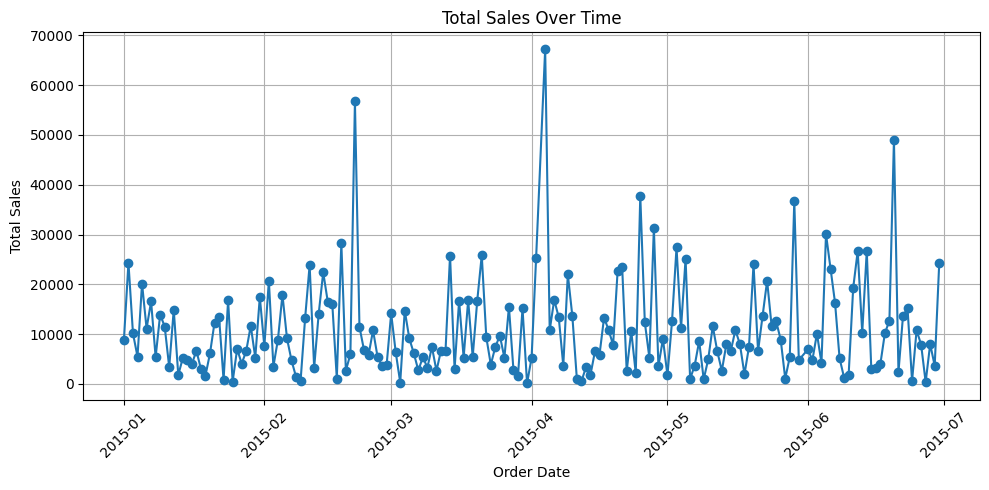

In [11]:
# What else to do in here: 
# Date fix
# EDA: to understand the data
# Step 4: Train ARIMA Model
# Define ARIMA model order (p, d, q)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

data = data.sort_values('Order Date')

data_agg = data.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(data_agg['Order Date'], data_agg['Sales'], marker='o', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

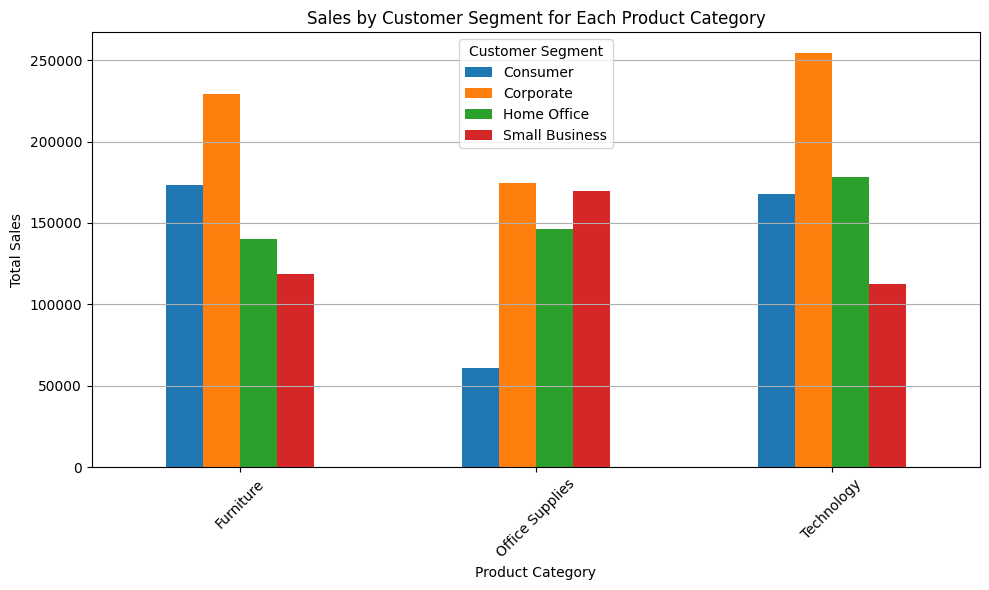

In [12]:

segment_sales = data.groupby(['Customer Segment', 'Product Category'])['Sales'].sum().reset_index()

pivot_segment_sales = segment_sales.pivot(index='Product Category', columns='Customer Segment', values='Sales')

pivot_segment_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Customer Segment for Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


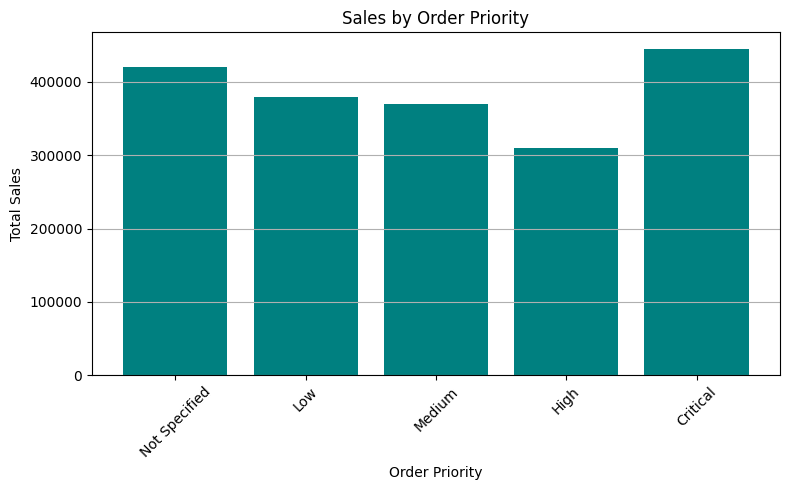

In [13]:
priority_sales = data.groupby('Order Priority')['Sales'].sum().reset_index()

priority_labels = {v: k for k, v in priority_mapping.items()}

priority_sales['Order Priority'] = priority_sales['Order Priority'].map(priority_labels)

plt.figure(figsize=(8, 5))
plt.bar(priority_sales['Order Priority'], priority_sales['Sales'], color='teal')
plt.title('Sales by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [15]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)

ADF Statistic: -23.017330426335956
p-value: 0.0


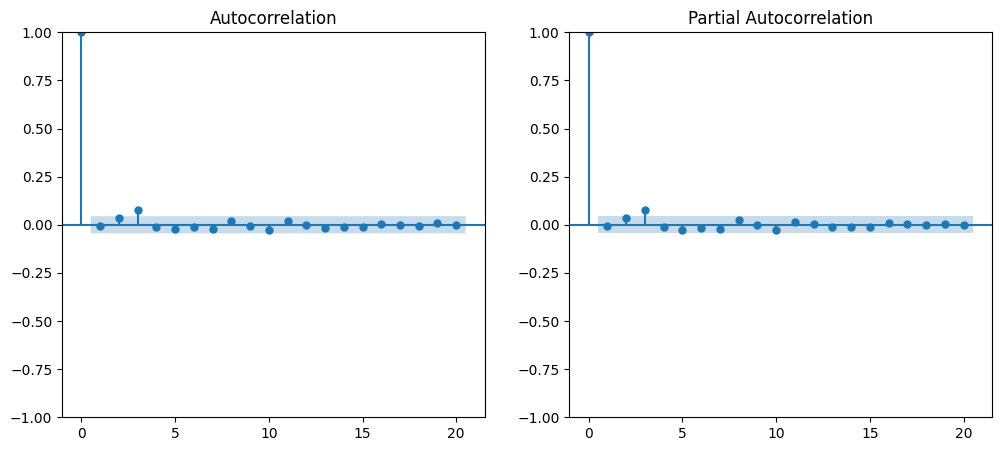

Identified ARIMA order: (p=2, d=0, q=1)


In [16]:
# Select the demand variable (e.g., Sales)
ts_data = data['Sales']

# Step 1: Check for stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1] <= 0.05  # Returns True if series is stationary

# Test stationarity
is_stationary = test_stationarity(ts_data)

# Step 2: Differencing if necessary
if not is_stationary:
    ts_data_diff = ts_data.diff().dropna()
    is_stationary = test_stationarity(ts_data_diff)
    d = 1
else:
    ts_data_diff = ts_data
    d = 0

# Step 3: Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(ts_data_diff, lags=20, ax=ax1)
plot_pacf(ts_data_diff, lags=20, ax=ax2)
plt.show()

# After visual inspection, set p and q based on ACF and PACF plots
p = 2  # Example value after examining PACF
q = 1  # Example value after examining ACF

print(f"Identified ARIMA order: (p={p}, d={d}, q={q})")

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

p = 1  # AR terms (from PACF)
d = 1  # Differencing
q = 1  # MA terms (from ACF)

# Fit the ARIMA model
model = ARIMA(ts_data, order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

c:\Users\ammou\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ammou\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ammou\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1952
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18082.746
Date:                Tue, 22 Oct 2024   AIC                          36171.493
Time:                        10:55:54   BIC                          36188.221
Sample:                             0   HQIC                         36177.643
                               - 1952                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0058      0.041     -0.142      0.887      -0.086       0.075
ma.L1         -1.0000      0.004   -236.484      0.000      -1.008      -0.992
sigma2      6.553e+06   6.49e-10   1.01e+16      0.0

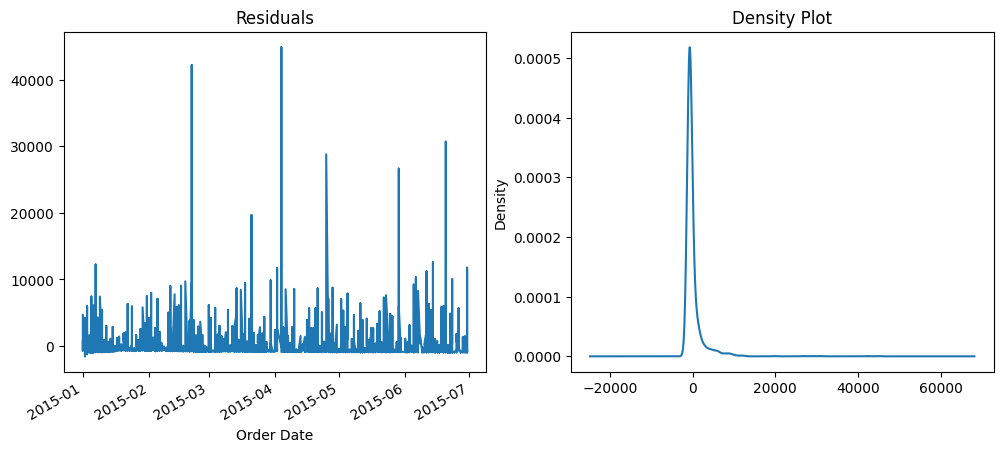

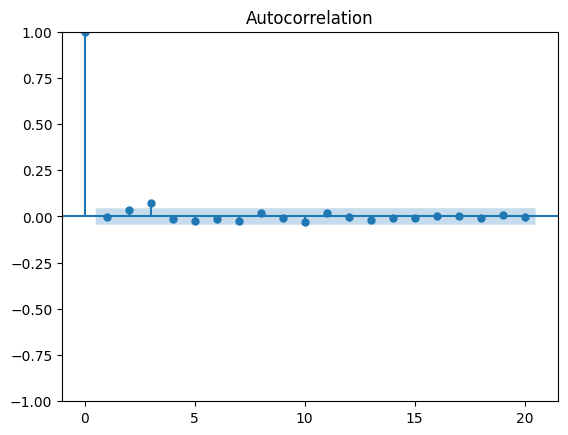

In [18]:
residuals = model_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
residuals.plot(ax=ax[0], title='Residuals')
residuals.plot(kind='kde', ax=ax[1], title='Density Plot')
plt.show()

# Check ACF plot of residuals
plot_acf(residuals, lags=20)
plt.show()

In [19]:
forecast = model_fit.forecast(steps=10)
print(forecast)

1952    989.293508
1953    985.372883
1954    985.395787
1955    985.395653
1956    985.395654
1957    985.395654
1958    985.395654
1959    985.395654
1960    985.395654
1961    985.395654
Name: predicted_mean, dtype: float64


c:\Users\ammou\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ammou\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Squared Error: 2875.390421650014


c:\Users\ammou\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:12:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


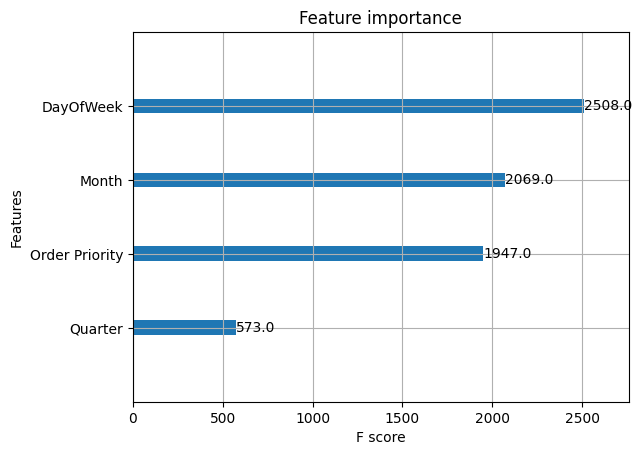

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Month'] = data['Ship Date'].dt.month
data['DayOfWeek'] = data['Ship Date'].dt.dayofweek
data['Quarter'] = data['Ship Date'].dt.quarter

features = ['Order Priority', 'Month', 'DayOfWeek', 'Quarter']
X = data[features]
y = data['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix format for XGBoost
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'colsample_bytree': 0.8,
    'subsample': 0.8
}

# Train the model
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=200)

# Predictions
y_pred = xgb_model.predict(test_dmatrix)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Feature Importance Plot (optional)
xgb.plot_importance(xgb_model)
plt.show()
